In [2]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../data/regression.csv")

x = df.iloc[:, :-1]
y = df.iloc[:, -1]

x_ssc = StandardScaler()
x_scaled = x_ssc.fit_transform(x)

x_scaled_tensor = torch.tensor(x_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x_scaled_tensor, y_tensor, test_size=0.2, shuffle=True)

In [4]:
class LinearRegressionModel(nn.Module): # torch.nn.Module을 상속받는 파이썬 클래스
    def __init__(self): #
        super().__init__()
        self.linear = nn.Linear(10, 1) # 단순 선형 회귀이므로 input_dim=1, output_dim=1.

    def forward(self, x):
        return self.linear(x)

In [5]:
_epochs = 2000

model = LinearRegressionModel()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) 

for epoch in range(_epochs + 1):
    
    hypothesis = model(x_train)
    cost = F.mse_loss(hypothesis, y_train)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print("Epoch {:4d}/{} Cost: {:.6f}".format(epoch, _epochs, cost.item()))

Epoch    0/2000 Cost: 30808.804688
Epoch  100/2000 Cost: 3349.268799
Epoch  200/2000 Cost: 2907.535400
Epoch  300/2000 Cost: 2896.879883
Epoch  400/2000 Cost: 2895.867676
Epoch  500/2000 Cost: 2895.201904
Epoch  600/2000 Cost: 2894.579346
Epoch  700/2000 Cost: 2893.981201
Epoch  800/2000 Cost: 2893.405518
Epoch  900/2000 Cost: 2892.850830
Epoch 1000/2000 Cost: 2892.315674
Epoch 1100/2000 Cost: 2891.799561
Epoch 1200/2000 Cost: 2891.301270
Epoch 1300/2000 Cost: 2890.820312
Epoch 1400/2000 Cost: 2890.355957
Epoch 1500/2000 Cost: 2889.907227
Epoch 1600/2000 Cost: 2889.474365
Epoch 1700/2000 Cost: 2889.055664
Epoch 1800/2000 Cost: 2888.651855
Epoch 1900/2000 Cost: 2888.260986
Epoch 2000/2000 Cost: 2887.883789


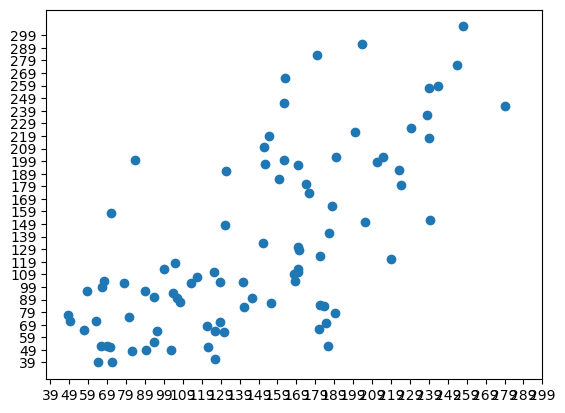

In [6]:
y_pred = model(x_test)
y_pred = y_pred.detach().numpy()
y_test = y_test.detach().numpy()

plt.scatter(y_pred, y_test)
plt.xticks(range(int(min(y_test)), int(max(y_test)), 10))
plt.yticks(range(int(min(y_test)), int(max(y_test)), 10))
plt.show()